In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from textblob import TextBlob 
import nltk

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Download NLTK data (only needed once)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shakt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shakt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Load the dataset
df = pd.read_csv("blogs.csv")

In [9]:
# Display first few rows of the dataset to understand its structure
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [10]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Data      0
Labels    0
dtype: int64


### 1. Data Preprocessing

In [24]:
# Convert text to lowercase, remove punctuation, and stopwords

# Define a function to clean text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join tokens back to a single string
    return ' '.join(tokens)

In [12]:
# Apply text preprocessing to the 'Data' column
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

In [13]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Set max features to limit feature dimensionality
X = tfidf.fit_transform(df['Cleaned_Data'])  # Convert cleaned text to TF-IDF features
y = df['Labels']  # Target variable

### 2. Naive Bayes Model for Text Classification

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize and train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [16]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test)

### 3. Sentiment Analysis

In [26]:
# Define a function for sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, neutral, or negative based on polarity
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

In [18]:
# Apply sentiment analysis to each blog post
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [19]:
# Analyze sentiment distribution across categories
sentiment_dist = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print("Sentiment Distribution Across Categories:\n", sentiment_dist)

Sentiment Distribution Across Categories:
 Sentiment                 Negative  Positive
Labels                                      
alt.atheism                   0.23      0.77
comp.graphics                 0.24      0.76
comp.os.ms-windows.misc       0.22      0.78
comp.sys.ibm.pc.hardware      0.20      0.80
comp.sys.mac.hardware         0.24      0.76
comp.windows.x                0.27      0.73
misc.forsale                  0.16      0.84
rec.autos                     0.17      0.83
rec.motorcycles               0.26      0.74
rec.sport.baseball            0.29      0.71
rec.sport.hockey              0.34      0.66
sci.crypt                     0.19      0.81
sci.electronics               0.19      0.81
sci.med                       0.29      0.71
sci.space                     0.27      0.73
soc.religion.christian        0.13      0.87
talk.politics.guns            0.30      0.70
talk.politics.mideast         0.22      0.78
talk.politics.misc            0.22      0.78
talk.religio

### 4. Evaluation of Naive Bayes Model

In [28]:
# Calculate and display accuracy, precision, recall, and F1-score
print("Model Performance Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Model Performance Metrics:
Accuracy: 0.8225
Precision: 0.8276176687627891
Recall: 0.8225
F1 Score: 0.8171026916205228


In [21]:
# Classification report for detailed performance analysis
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.87        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.88      0.88     

In [22]:
# Display overall sentiment distribution for insights
print("\nSentiment Distribution:\n", df['Sentiment'].value_counts(normalize=True))


Sentiment Distribution:
 Positive    0.7715
Negative    0.2285
Name: Sentiment, dtype: float64


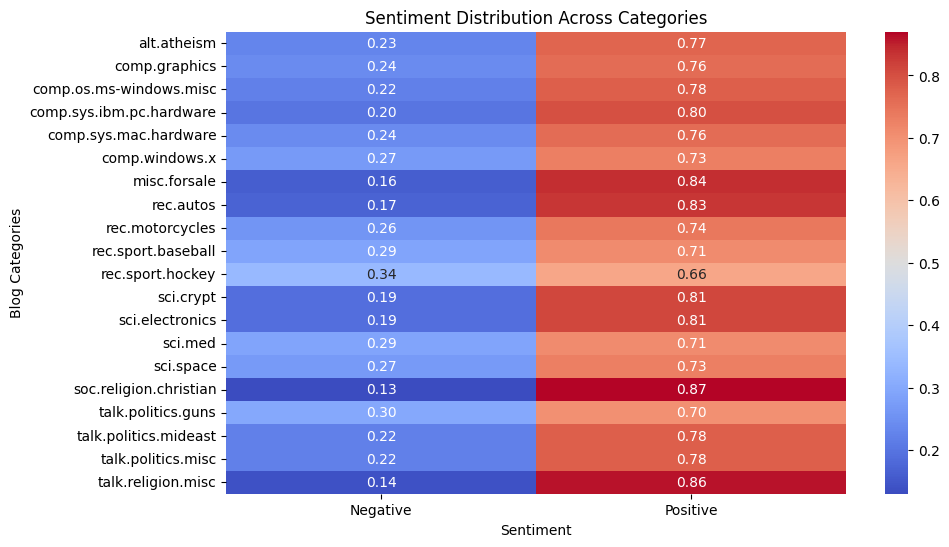

In [23]:
# Visualize sentiment distribution across categories 
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the sentiment distribution across categories
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_dist, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Sentiment")
plt.ylabel("Blog Categories")
plt.show()

### Explanation of Key Sections:
1. **Preprocessing Function**: Converts text to lowercase, removes punctuation and stopwords, and tokenizes the text.
2. **TF-IDF Feature Extraction**: Converts cleaned text to a format usable by Naive Bayes.
3. **Naive Bayes Model Training**: Splits data, trains the model, and evaluates it.
4. **Sentiment Analysis**: Uses TextBlob to classify each blog post's sentiment.
5. **Evaluation and Visualization**: Outputs model performance metrics and visualizes sentiment distribution across categories.